#  NLP sobre art√≠culos del MoMA: Henri Matisse

An√°lisis b√°sico de procesamiento de lenguaje natural (NLP) sobre tres art√≠culos del Museo de Arte Moderno (MoMA) que tratan sobre Henri Matisse.

Se aplicar√°n t√©cnicas como:

- Tokenizaci√≥n
- Lematizaci√≥n
- Remoci√≥n de stopwords
- Etiquetado gramatical (POS-tagging)
- An√°lisis de frecuencia


In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Descarga de recursos de NLTK

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')  # ‚úÖ Soluciona tu error actual

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [ ]:
import requests

url = 'https://raw.githubusercontent.com/maicac/DataScienceIII/refs/heads/main/Articulos%20MoMA.txt'
response = requests.get(url)
text = response.text

print(text[:1000])

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")


In [ ]:
# Procesar el texto
doc = nlp(text)

# Ver cantidad de tokens procesados
print(f"N√∫mero total de tokens: {len(doc)}")


N√∫mero total de tokens: 3857


In [ ]:
# Tokenizaci√≥n + Lematizaci√≥n + POS-tagging + remoci√≥n de stopwords y puntuaci√≥n

tokens = [
    (token.text, token.lemma_, token.pos_)
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Mostrar algunos ejemplos
for tok in tokens[:10]:
    print(tok)

('\ufeffArticulos', '\ufeffArticulos', 'PROPN')
('MoMA', 'MoMA', 'PROPN')
('Anarchist', 'Anarchist', 'PROPN')
('Friends', 'friend', 'NOUN')
('F√©lix', 'F√©lix', 'PROPN')
('F√©n√©on', 'F√©n√©on', 'PROPN')
('Artists', 'artist', 'NOUN')
('Championed', 'champion', 'VERB')
('F√©n√©on', 'F√©n√©on', 'PROPN')
('know', 'know', 'VERB')


In [ ]:
from collections import Counter

# Contar palabras m√°s frecuentes
words = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
word_freq = Counter(words)

# Mostrar las 10 palabras m√°s frecuentes
word_freq.most_common(10)

[('Matisse', 43),
 ('artist', 22),
 ('F√©n√©on', 21),
 ('art', 18),
 ('color', 16),
 ('studio', 16),
 ('new', 15),
 ('painting', 14),
 ('Seurat', 13),
 ('Signac', 13)]

In [ ]:
# Frecuencia de clases gramaticales (Part-of-Speech)
pos_tags = [token.pos_ for token in doc if not token.is_punct and not token.is_space]
pos_counts = Counter(pos_tags)

# Mostrar frecuencias por tipo
pos_counts

Counter({'PROPN': 354,
         'DET': 355,
         'CCONJ': 140,
         'PRON': 236,
         'NOUN': 684,
         'ADP': 409,
         'VERB': 333,
         'AUX': 156,
         'PART': 90,
         'SCONJ': 59,
         'NUM': 68,
         'ADV': 137,
         'ADJ': 293,
         'X': 5,
         'PUNCT': 1})

In [ ]:
# Reconocimiento de Entidades Nombradas (NER)

for ent in doc.ents:
    print(ent.text, "->", ent.label_)

Georges
Seurat -> PERSON
Paul Signac -> ORG
Henri Matisse -> PERSON
today -> DATE
15, 2020 -> DATE
1861‚Äì1944 -> CARDINAL
Georges Seurat -> PERSON
Paul Signac -> ORG
Pierre Bonnard -> PERSON
Henri Matisse -> PERSON
Amedeo Modigliani -> PERSON
Seurat -> ORG
Signac -> ORG
Matisse -> ORG
Neo-Impressionism -> ORG
Seurat‚Äôs -> ORG
Signac -> ORG
F√©n√©on -> ORG
France -> GPE
MoMA -> GPE
March -> DATE
Museum -> ORG
Virtual Views -> ORG
Below -> PERSON
Starr Figura -> PERSON
MoMA‚Äôs Department of Drawings and Prints -> ORG
Isabelle Cahn -> PERSON
Mus√©e -> PERSON
Philippe Peltier -> PERSON
Oc√©ania -> GPE
Insulindia Unit -> ORG
Branly -> ORG
Jacques Chirac -> PERSON
F√©n√©on -> ORG
today -> DATE
Starr Figura -> PERSON
the late 19th century -> DATE
Paris -> GPE
the Belle √âpoque -> FAC
first -> ORDINAL
thousands -> CARDINAL
Paul Signac -> ORG
1896 -> DATE
Arcadian -> NORP
the Time of Anarchy -> ORG
Signac -> ORG
the 1890s -> DATE
F√©n√©on -> ORG
the 20th century -> DATE
Signac -> ORG
Galerie

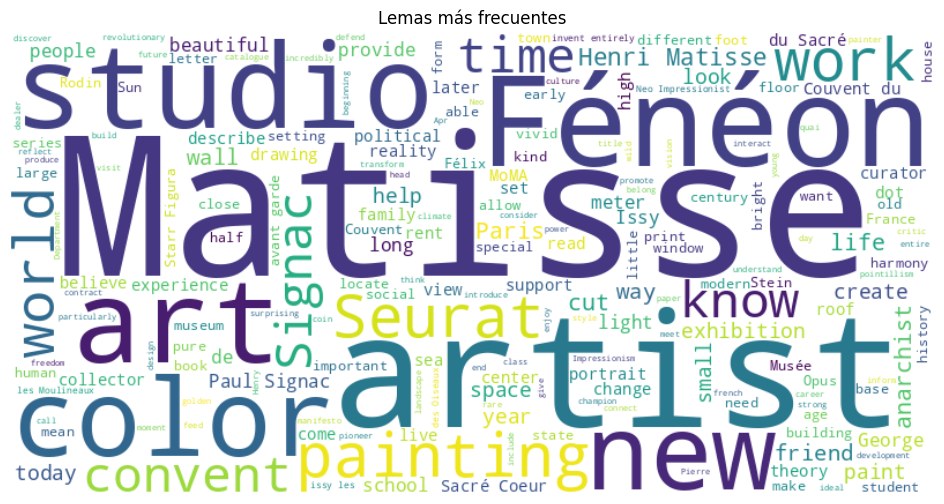

In [ ]:
# Visualizaci√≥n: WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Lista de colores
my_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3', '#ff6f61', '#8e7cc3']

# Funci√≥n para generar colores aleatorios de tu lista
def color_func(word, **kwargs):
    return random.choice(my_colors)

# Crear nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(lemmas))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Palabras m√°s frecuentes")
plt.show()


In [ ]:
#  Ejemplo de preprocesamiento NLP sobre un fragmento de texto

# Fragmento de ejemplo
sample_text = """It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife."""

# 1. Tokenizaci√≥n
tokens = word_tokenize(sample_text)
print("üîπ Tokens:", tokens)

# 2. Remoci√≥n de stopwords
stop_words = set(stopwords.words('english'))
tokens_filtered = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]
print("üîπ Tokens sin stopwords:", tokens_filtered)

# 3. Lematizaci√≥n
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in tokens_filtered]
print("üîπ Lematizaci√≥n:", lemmatized)

# 4. POS-tagging
pos_tags = pos_tag(lemmatized)
print("üîπ POS Tags:", pos_tags)


üîπ Tokens: ['It', 'is', 'a', 'truth', 'universally', 'acknowledged', ',', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', ',', 'must', 'be', 'in', 'want', 'of', 'a', 'wife', '.']
üîπ Tokens sin stopwords: ['truth', 'universally', 'acknowledged', 'single', 'man', 'possession', 'good', 'fortune', 'must', 'want', 'wife']
üîπ Lematizaci√≥n: ['truth', 'universally', 'acknowledged', 'single', 'man', 'possession', 'good', 'fortune', 'must', 'want', 'wife']
üîπ POS Tags: [('truth', 'NN'), ('universally', 'RB'), ('acknowledged', 'VBD'), ('single', 'JJ'), ('man', 'NN'), ('possession', 'NN'), ('good', 'JJ'), ('fortune', 'NN'), ('must', 'MD'), ('want', 'VB'), ('wife', 'NN')]


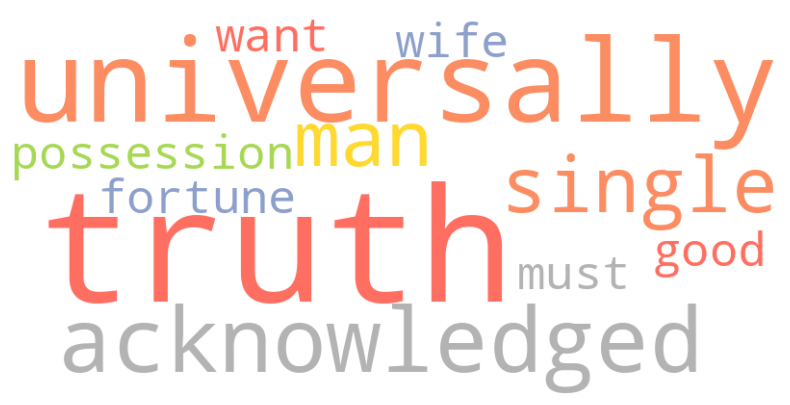

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Convertir tokens filtrados a min√∫sculas
tokens_lower = [word.lower() for word in tokens_filtered]

# Crear un solo string para WordCloud
text_for_wordcloud = " ".join(tokens_lower)

my_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3', '#ff6f61', '#8e7cc3']

def color_func(word, **kwargs):
    return random.choice(my_colors)

# Generar y mostrar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text_for_wordcloud)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from nltk import bigrams, FreqDist

# Crear bigramas
bigrams_list = list(bigrams(tokens_lower))

# Contar los bigramas m√°s frecuentes
fdist_bigrams = FreqDist(bigrams_list)

# Mostrar los 10 bigramas m√°s comunes
print("üî∏ Top 10 Bigramas m√°s frecuentes:")
for pair, freq in fdist_bigrams.most_common(10):
    print(f"{pair}: {freq}")


üî∏ Top 10 Bigramas m√°s frecuentes:
('truth', 'universally'): 1
('universally', 'acknowledged'): 1
('acknowledged', 'single'): 1
('single', 'man'): 1
('man', 'possession'): 1
('possession', 'good'): 1
('good', 'fortune'): 1
('fortune', 'must'): 1
('must', 'want'): 1
('want', 'wife'): 1


In [ ]:
from textblob import TextBlob

# Crear un TextBlob a partir del texto de ejemplo
blob = TextBlob(sample_text)

# Mostrar polaridad y subjetividad
print("üîπ An√°lisis de Sentimiento:")
print(f"Polaridad: {blob.sentiment.polarity} (de -1 a 1)")
print(f"Subjetividad: {blob.sentiment.subjectivity} (de 0 a 1)")


üîπ An√°lisis de Sentimiento:
Polaridad: 0.20952380952380953 (de -1 a 1)
Subjetividad: 0.27142857142857146 (de 0 a 1)


# **Deep Learning**

An√°lisis exploratorio

In [ ]:
!pip install tensorflow


In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

%cd '/content/gdrive/MyDrive/Coder /Dataset'

import pandas as pd
import numpy as np


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Coder /Dataset


In [ ]:
df = pd.read_csv('Artworks.csv')
df.head()

<ipython-input-67-1fb56993d529>:1: DtypeWarning: Columns (17,20,21,22,23,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Artworks.csv')


Title  \
0  Ferdinandsbr√ºcke Project, Vienna, Austria, Ele...   
1  City of Music, National Superior Conservatory ...   
2  Villa near Vienna Project, Outside Vienna, Aus...   
3  The Manhattan Transcripts Project, New York, N...   
4  Villa, project, outside Vienna, Austria, Exter...   

                     Artist ConstituentID  \
0               Otto Wagner          6210   
1  Christian de Portzamparc          7470   
2                Emil Hoppe          7605   
3           Bernard Tschumi          7056   
4                Emil Hoppe          7605   

                                   ArtistBio Nationality BeginDate EndDate  \
0                      (Austrian, 1841‚Äì1918)  (Austrian)    (1841)  (1918)   
1                        (French, born 1944)    (French)    (1944)     (0)   
2                      (Austrian, 1876‚Äì1957)  (Austrian)    (1876)  (1957)   
3  (French and Swiss, born Switzerland 1944)          ()    (1944)     (0)   
4                      (Austrian, 1876‚Äì1957)  (Austrian)    (1876)  (1957)   

   Gender  Date                                             Medium  ...  \
0  (Male)  1896      Ink and cut-and-pasted painted pages on paper  ...   
1  (Male)  1987                  Paint and colored pencil on print  ...   
2  (Male)  1903  Graphite, pen, color pencil, ink, and gouache ...  ...   
3  (Male)  1980  Photographic reproduction with colored synthet...  ...   
4  (Male)  1903  Graphite, color pencil, ink, and gouache on tr...  ...   

  Weight (kg) Width (cm) Seat Height (cm) Duration (sec.) Unnamed: 29  \
0         NaN      168.9              NaN             NaN         NaN   
1         NaN    29.8451              NaN             NaN         NaN   
2         NaN       31.8              NaN             NaN         NaN   
3         NaN       50.8              NaN             NaN         NaN   
4         NaN       19.1              NaN             NaN         NaN   

  Unnamed: 30 Unnamed: 31 Unnamed: 32 Unnamed: 33 Unnamed: 34  
0         NaN         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN         NaN  

[5 rows x 35 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132403 entries, 0 to 132402
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               132349 non-null  object 
 1   Artist              130947 non-null  object 
 2   ConstituentID       130942 non-null  object 
 3   ArtistBio           127701 non-null  object 
 4   Nationality         130935 non-null  object 
 5   BeginDate           130940 non-null  object 
 6   EndDate             130940 non-null  object 
 7   Gender              130939 non-null  object 
 8   Date                130217 non-null  object 
 9   Medium              121179 non-null  object 
 10  Dimensions          121178 non-null  object 
 11  CreditLine          129462 non-null  object 
 12  AccessionNumber     132394 non-null  object 
 13  Classification      132402 non-null  object 
 14  Department          132402 non-null  object 
 15  DateAcquired        126416 non-nul

In [ ]:
df.drop(columns=['Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Length (cm)', 'Weight (kg)', 'Seat Height (cm)', 'ThumbnailURL'])

Title  \
0       Ferdinandsbr√ºcke Project, Vienna, Austria, Ele...   
1       City of Music, National Superior Conservatory ...   
2       Villa near Vienna Project, Outside Vienna, Aus...   
3       The Manhattan Transcripts Project, New York, N...   
4       Villa, project, outside Vienna, Austria, Exter...   
...                                                   ...   
132398  An Episode in the Life of a Landscape Painter ...   
132399              Incense Sweaters & Ice (Installation)   
132400                                       Just For You   
132401                 Marey and Demeny Chronophotographs   
132402                          Four Saints in Three Acts   

                          Artist ConstituentID  \
0                    Otto Wagner          6210   
1       Christian de Portzamparc          7470   
2                     Emil Hoppe          7605   
3                Bernard Tschumi          7056   
4                     Emil Hoppe          7605   
...                          ...           ...   
132398                       NaN           NaN   
132399              Martine Syms         68036   
132400              Ken Friedman          2007   
132401                       NaN           NaN   
132402               Julien Levy          3522   

                                        ArtistBio Nationality BeginDate  \
0                           (Austrian, 1841‚Äì1918)  (Austrian)    (1841)   
1                             (French, born 1944)    (French)    (1944)   
2                           (Austrian, 1876‚Äì1957)  (Austrian)    (1876)   
3       (French and Swiss, born Switzerland 1944)          ()    (1944)   
4                           (Austrian, 1876‚Äì1957)  (Austrian)    (1876)   
...                                           ...         ...       ...   
132398                                        NaN         NaN       NaN   
132399                           (American, 1988)  (American)    (1988)   
132400                      (American, born 1949)  (American)    (1939)   
132401                                        NaN         NaN       NaN   
132402                      (American, 1906‚Äì1981)  (American)    (1906)   

       EndDate  Gender       Date  \
0       (1918)  (Male)       1896   
1          (0)  (Male)       1987   
2       (1957)  (Male)       1903   
3          (0)  (Male)       1980   
4       (1957)  (Male)       1903   
...        ...     ...        ...   
132398     NaN     NaN       2006   
132399     (0)      ()       2017   
132400     (0)  (Male)       1967   
132401     NaN     NaN  1892‚Äì1900   
132402  (1981)  (Male)       1934   

                                                   Medium  ...  \
0           Ink and cut-and-pasted painted pages on paper  ...   
1                       Paint and colored pencil on print  ...   
2       Graphite, pen, color pencil, ink, and gouache ...  ...   
3       Photographic reproduction with colored synthet...  ...   
4       Graphite, color pencil, ink, and gouache on tr...  ...   
...                                                   ...  ...   
132398  Book from a multiple of archival carrying case...  ...   
132399                               Video (color, sound)  ...   
132400                                                NaN  ...   
132401                35mm film (black and white, silent)  ...   
132402                                                NaN  ...   

       AccessionNumber    Classification                  Department  \
0             885.1996      Architecture       Architecture & Design   
1               1.1995      Architecture       Architecture & Design   
2               1.1997      Architecture       Architecture & Design   
3               2.1995      Architecture       Architecture & Design   
4               2.1997      Architecture       Architecture & Design   
...                ...               ...                         ...   
132398     656.2017.19  Illustrated Book  Prints & Illustrated B

In [ ]:
df.isnull().sum()
df_clean = df.fillna(0)

df_clean.head()


Title  \
0  Ferdinandsbr√ºcke Project, Vienna, Austria, Ele...   
1  City of Music, National Superior Conservatory ...   
2  Villa near Vienna Project, Outside Vienna, Aus...   
3  The Manhattan Transcripts Project, New York, N...   
4  Villa, project, outside Vienna, Austria, Exter...   

                     Artist ConstituentID  \
0               Otto Wagner          6210   
1  Christian de Portzamparc          7470   
2                Emil Hoppe          7605   
3           Bernard Tschumi          7056   
4                Emil Hoppe          7605   

                                   ArtistBio Nationality BeginDate EndDate  \
0                      (Austrian, 1841‚Äì1918)  (Austrian)    (1841)  (1918)   
1                        (French, born 1944)    (French)    (1944)     (0)   
2                      (Austrian, 1876‚Äì1957)  (Austrian)    (1876)  (1957)   
3  (French and Swiss, born Switzerland 1944)          ()    (1944)     (0)   
4                      (Austrian, 1876‚Äì1957)  (Austrian)    (1876)  (1957)   

   Gender  Date                                             Medium  ...  \
0  (Male)  1896      Ink and cut-and-pasted painted pages on paper  ...   
1  (Male)  1987                  Paint and colored pencil on print  ...   
2  (Male)  1903  Graphite, pen, color pencil, ink, and gouache ...  ...   
3  (Male)  1980  Photographic reproduction with colored synthet...  ...   
4  (Male)  1903  Graphite, color pencil, ink, and gouache on tr...  ...   

  Weight (kg) Width (cm) Seat Height (cm) Duration (sec.) Unnamed: 29  \
0         0.0      168.9              0.0             0.0         0.0   
1         0.0    29.8451              0.0             0.0         0.0   
2         0.0       31.8              0.0             0.0         0.0   
3         0.0       50.8              0.0             0.0         0.0   
4         0.0       19.1              0.0             0.0         0.0   

  Unnamed: 30 Unnamed: 31 Unnamed: 32 Unnamed: 33 Unnamed: 34  
0         0.0         0.0         0.0         0.0         0.0  
1         0.0         0.0         0.0         0.0         0.0  
2         0.0         0.0         0.0         0.0         0.0  
3         0.0         0.0         0.0         0.0         0.0  
4         0.0         0.0         0.0         0.0         0.0  

[5 rows x 35 columns]

*Insights del An√°lisis Exploratorio*
<br>


*Departamento dominante:* El departamento de Drawings and Prints posee la mayor cantidad de obras, muy por encima de los dem√°s. Esto sugiere una especializaci√≥n o mayor volumen en este tipo de piezas dentro del museo.
<br>
<br>
*Desbalance de g√©nero:* Predominan los artistas masculinos en el conjunto de datos. Hay una notoria subrepresentaci√≥n de artistas femeninas, lo que puede evidenciar una desigualdad hist√≥rica en la adquisici√≥n o producci√≥n art√≠stica.
<br>
<br>
*Incremento de adquisiciones en los √∫ltimos a√±os:* Se observa una clara tendencia ascendente en la cantidad de obras adquiridas a partir de mediados del siglo XX, con picos en los √∫ltimos a√±os registrados. Esto puede deberse a pol√≠ticas de expansi√≥n, digitalizaci√≥n o donaciones recientes.

In [ ]:
df_clean = df.copy()

columns_to_drop = [
    'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
    'Unnamed: 33', 'Unnamed: 34', 'Circumference (cm)', 'Depth (cm)',
    'Diameter (cm)', 'Length (cm)', 'Weight (kg)', 'Seat Height (cm)',
    'ThumbnailURL'
]
df_clean.drop(columns=columns_to_drop, inplace=True, errors='ignore')

for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].fillna('Unknown')
    else:
        df_clean[col] = df_clean[col].fillna(0)

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 125682 entries, 0 to 132402
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Title            125682 non-null  object        
 1   Artist           125682 non-null  object        
 2   ConstituentID    125682 non-null  object        
 3   ArtistBio        125682 non-null  object        
 4   Nationality      125682 non-null  object        
 5   BeginDate        125682 non-null  object        
 6   EndDate          125682 non-null  object        
 7   Gender           125682 non-null  object        
 8   Date             125682 non-null  object        
 9   Medium           125682 non-null  object        
 10  Dimensions       125682 non-null  object        
 11  CreditLine       125682 non-null  object        
 12  AccessionNumber  125682 non-null  object        
 13  Classification   125682 non-null  object        
 14  Department       125682 n

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Seleccionar solo las columnas relevantes y quitar nulos
df_model = df[['Title', 'Classification']].dropna()

# 2. Convertir t√≠tulos a min√∫sculas (opcional)
df_model['Title'] = df_model['Title'].str.lower()

# 3. Codificar las etiquetas
label_encoder = LabelEncoder()
df_model['Label'] = label_encoder.fit_transform(df_model['Classification'])

# 4. Tokenizar los t√≠tulos
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_model['Title'])
sequences = tokenizer.texts_to_sequences(df_model['Title'])

# 5. Padding
maxlen = 20
X = pad_sequences(sequences, maxlen=maxlen)
y = df_model['Label'].values

# 6. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Definir par√°metros
vocab_size = 5000
embedding_dim = 64
max_length = 20
num_classes = len(label_encoder.classes_)

# Construcci√≥n del modelo
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilaci√≥n
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenamiento
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

# Evaluaci√≥n
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
2513/2513 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 57s 20ms/step - accuracy: 0.5026 - loss: 1.5743 - val_accuracy: 0.6841 - val_loss: 0.9993
Epoch 2/5
2513/2513 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 52s 21ms/step - accuracy: 0.6937 - loss: 0.9592 - val_accuracy: 0.6999 - val_loss: 0.9442
Epoch 3/5
2513/2513 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81s 20ms/step - accuracy: 0.7175 - loss: 0.8718 - val_accuracy: 0.7032 - val_loss: 0.9215
Epoch 4/5
2513/2513 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50s 20ms/step - accuracy: 0.7310 - loss: 0.8289 - val_accuracy: 0.7070 - val_loss: 0.9234
Epoch 5/5
2513/2513 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81s 19ms/step - accuracy: 0.7365 - loss: 0.7925 - val_accuracy: 0.7104 - val_loss: 0.9226
786/786 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 5ms/step - accuracy: 0.7179 - loss: 0.8994
Test Accuracy: 0.7134


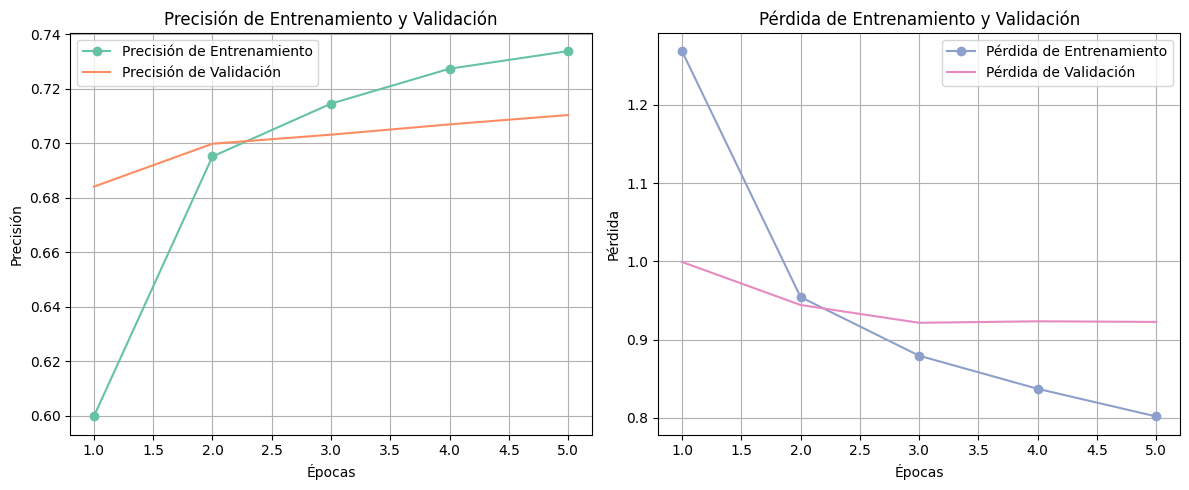

In [ ]:
import matplotlib.pyplot as plt

# Obtener los datos del historial de entrenamiento
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Graficar la precisi√≥n de entrenamiento y validaci√≥n
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gr√°fico
plt.plot(epochs, accuracy, color=my_colors[0], marker='o', label='Precisi√≥n de Entrenamiento')
plt.plot(epochs, val_accuracy, color=my_colors[1], label='Precisi√≥n de Validaci√≥n')

plt.title('Precisi√≥n de Entrenamiento y Validaci√≥n')
plt.xlabel('√âpocas')
plt.ylabel('Precisi√≥n')
plt.legend()
plt.grid(True)

# Graficar la p√©rdida de entrenamiento y validaci√≥n
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gr√°fico
plt.plot(epochs, loss, color=my_colors[2], marker='o', label='P√©rdida de Entrenamiento')
plt.plot(epochs, val_loss, color=my_colors[3], label='P√©rdida de Validaci√≥n')

plt.title('P√©rdida de Entrenamiento y Validaci√≥n')
plt.xlabel('√âpocas')
plt.ylabel('P√©rdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout

# Dimensiones de los datos
vocab_size = 5000
maxlen = 20
embedding_dim = 100
num_classes = len(label_encoder.classes_)

# Modelo de Deep Learning Mejorado
model_mejorado = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(100, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model_mejorado.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_mejorado.summary()

# Entrenar el modelo mejorado
print("\nEntrenando Modelo Mejorado...")
history_mejorado = model_mejorado.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# Evaluar el modelo mejorado
print("\nEvaluaci√≥n del Modelo Mejorado:")
loss_mejorado, accuracy_mejorado = model_mejorado.evaluate(X_test, y_test)
print(f"Test Accuracy (Modelo Mejorado): {accuracy_mejorado:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding_2 (Embedding)         ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ spatial_dropout1d               ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îÇ (SpatialDropout1D)              ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional (Bidirectional)   ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Entrenando Modelo Mejorado...
Epoch 1/10
3141/3141 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 161s 49ms/step - accuracy: 0.5380 - loss: 1.4387 - val_accuracy: 0.6947 - val_loss: 0.9535
Epoch 2/10
3141/3141 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 202s 49ms/step - accuracy: 0.7049 - loss: 0.9180 - val_accuracy: 0.7066 - val_loss: 0.9053
Epoch 3/10
3141/3141 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 199s 48ms/step - accuracy: 0.7226 - loss: 0.8475 - val_accuracy: 0.7097 - val_loss: 0.8946
Epoch 4/10
3141/3141 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 201s 48ms/step - accuracy: 0.7328 - loss: 0.8110 - val_accuracy: 0.7182 - val_loss: 0.8847
Epoch 5/10
3141/3141 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 201s 48ms/step - accuracy: 0.7441 - loss: 0.7747 - val_accuracy: 0.7198 - val_loss: 0.8912
Epoch 6/10
3141/3141 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 202s 48ms/step - accur


--- M√©tricas Detalladas para el Modelo Sencillo ---
786/786 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 6ms/step

Reporte de Clasificaci√≥n (Modelo Sencillo):
                                precision    recall  f1-score   support

                (not assigned)       0.58      0.36      0.44       125
                  Architecture       0.89      0.88      0.88       594
                         Audio       0.43      0.02      0.04       161
                       Collage       0.00      0.00      0.00         2
                        Design       0.69      0.73      0.71      2201
                       Drawing       0.70      0.39      0.50      2348
                      Ephemera       0.56      0.36      0.43        14
                          Film       0.28      0.07      0.11       439
    Frank Lloyd Wright Archive       0.00      0.00      0.00        12
              Illustrated Book       0.96      0.90      0.93      5157
                  Installa

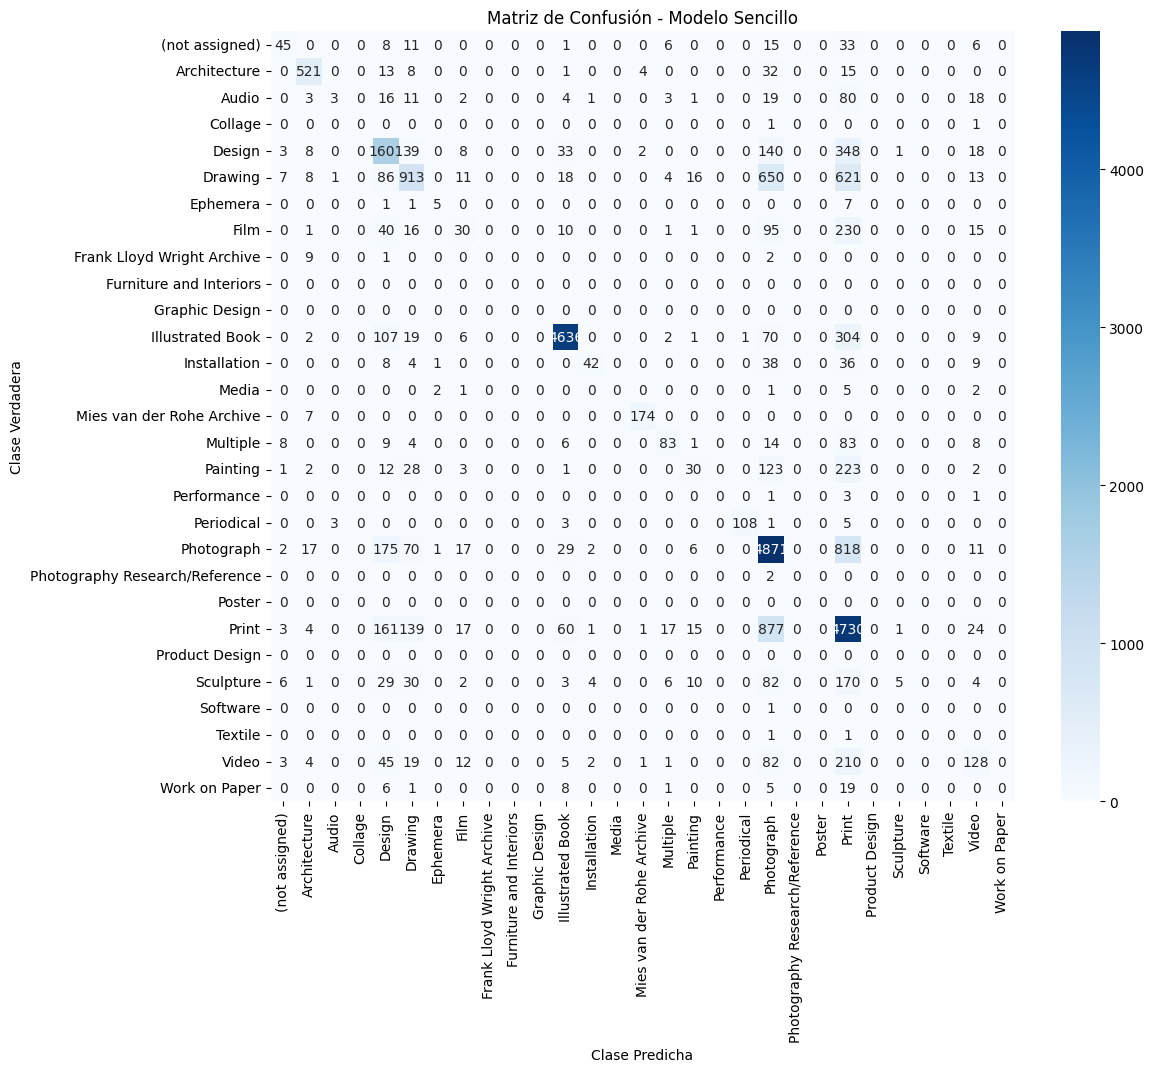


--- M√©tricas Detalladas para el Modelo Mejorado ---
786/786 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 15ms/step

Reporte de Clasificaci√≥n (Modelo Mejorado):
                                precision    recall  f1-score   support

                (not assigned)       0.59      0.44      0.50       125
                  Architecture       0.92      0.89      0.90       594
                         Audio       0.35      0.16      0.22       161
                       Collage       0.00      0.00      0.00         2
                        Design       0.71      0.75      0.73      2201
                       Drawing       0.47      0.59      0.52      2348
                      Ephemera       0.29      0.36      0.32        14
                          Film       0.22      0.15      0.18       439
    Frank Lloyd Wright Archive       1.00      0.08      0.15        12
              Illustrated Book       0.95      0.91      0.93      5157
                  Instal

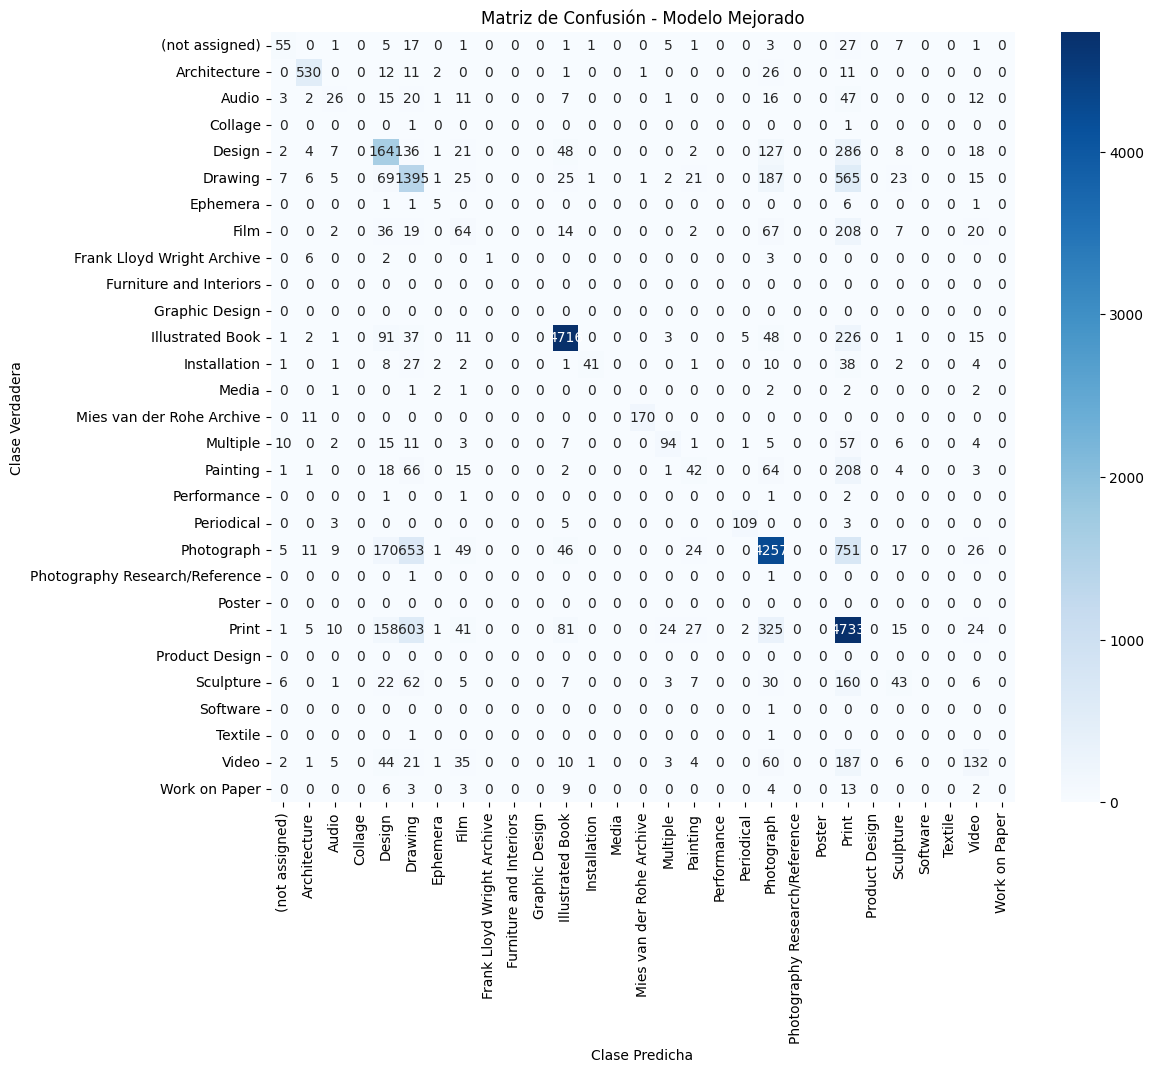

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# --- Para el Modelo Sencillo ---
print("\n--- M√©tricas Detalladas para el Modelo Sencillo ---")
# Obtener predicciones (probabilidades)
y_pred_proba_sencillo = model.predict(X_test)

# Convertir probabilidades a etiquetas de clase (argmax para one-hot)
y_pred_sencillo = np.argmax(y_pred_proba_sencillo, axis=1)

y_test_original_labels = label_encoder.inverse_transform(y_test)
y_pred_original_labels_sencillo = label_encoder.inverse_transform(y_pred_sencillo)


print("\nReporte de Clasificaci√≥n (Modelo Sencillo):")
print(classification_report(y_test_original_labels, y_pred_original_labels_sencillo, zero_division=0))

# Matriz de Confusi√≥n
cm_sencillo = confusion_matrix(y_test_original_labels, y_pred_original_labels_sencillo, labels=label_encoder.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_sencillo, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusi√≥n - Modelo Sencillo')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()

# --- Para el Modelo Mejorado ---
print("\n--- M√©tricas Detalladas para el Modelo Mejorado ---")
y_pred_proba_mejorado = model_mejorado.predict(X_test)
y_pred_mejorado = np.argmax(y_pred_proba_mejorado, axis=1)
y_pred_original_labels_mejorado = label_encoder.inverse_transform(y_pred_mejorado)

print("\nReporte de Clasificaci√≥n (Modelo Mejorado):")
print(classification_report(y_test_original_labels, y_pred_original_labels_mejorado, zero_division=0))

cm_mejorado = confusion_matrix(y_test_original_labels, y_pred_original_labels_mejorado, labels=label_encoder.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_mejorado, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusi√≥n - Modelo Mejorado')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.show()


# Conclusiones
An√°lisis comparativo del rendimiento de dos modelos de redes neuronales.
<br>

*. Modelo Sencillo (Arquitectura y Rendimiento Base):*
El primer modelo implementado, consisti√≥ en una red neuronal secuencial con una capa Embedding para la representaci√≥n vectorial de las palabras, seguida de una capa LSTM (Long Short-Term Memory) para procesar la secuencia de texto. Se incluy√≥ una capa Dropout para regularizaci√≥n y una capa Dense final con activaci√≥n softmax para la clasificaci√≥n multiclase. Este modelo fue entrenado durante 5 √©pocas.
Tras el entrenamiento, el modelo alcanz√≥ las siguientes m√©tricas de rendimiento en el conjunto de validaci√≥n (usadas como indicativo del rendimiento en prueba):
Precisi√≥n de Validaci√≥n (val_accuracy): Aproximadamente 70.49%
P√©rdida de Validaci√≥n (val_loss): Aproximadamente 0.9575
Los gr√°ficos de precisi√≥n y p√©rdida de entrenamiento y validaci√≥n mostraron una clara tendencia de aprendizaje, pero tambi√©n evidenciaron un overfitting moderado, donde la precisi√≥n de entrenamiento era consistentemente superior a la de validaci√≥n, y la p√©rdida de entrenamiento disminu√≠a m√°s r√°pidamente que la de validaci√≥n.
<br>
<br>
<br>
*. Modelo Mejorado (Arquitectura y Rendimiento):*
Se incorporaron capas adicionales y se ajustaron las existentes. Las principales modificaciones en este modelo, entrenado durante 10 √©pocas, fueron:
La inclusi√≥n de una capa SpatialDropout1D despu√©s del Embedding para una regularizaci√≥n m√°s espec√≠fica de los vectores de palabras.
La sustituci√≥n de la capa LSTM por una Bidirectional(LSTM), permitiendo al modelo procesar la secuencia de texto tanto hacia adelante como hacia atr√°s, lo que a menudo mejora la comprensi√≥n del contexto y las dependencias a largo plazo.
La adici√≥n de una capa Dense intermedia con activaci√≥n ReLU y otra capa Dropout para aumentar la capacidad de aprendizaje y a√±adir m√°s puntos de regularizaci√≥n.
El entrenamiento del modelo mejorado result√≥ en las siguientes m√©tricas en el conjunto de prueba (validaci√≥n):
Precisi√≥n (Test/Validation Accuracy): 71.85%
P√©rdida (Test/Validation Loss): 0.9349" "Adicionalmente, se observ√≥ una Precisi√≥n de Entrenamiento de 77.37% y una P√©rdida de Entrenamiento de 0.6632 en la √∫ltima √©poca.
<br>
<br>
<br>
*. Comparaci√≥n de Resultados y Dimensionamiento de Mejoras:*
Diferencias en el rendimiento entre ambos modelos:
En t√©rminos de Precisi√≥n: El modelo mejorado logr√≥ una precisi√≥n de validaci√≥n de 71.85%, lo que representa una ligera mejora de aproximadamente 1.36 puntos porcentuales respecto al modelo sencillo (70.49%).
En t√©rminos de P√©rdida: La p√©rdida en el conjunto de prueba para el modelo mejorado fue de 0.9349, que es ligeramente menor que la p√©rdida de 0.9575 del modelo sencillo, indicando una mejor capacidad de ajuste a los datos no vistos.
Analizando los gr√°ficos de entrenamiento y validaci√≥n de ambos modelos, se puede apreciar que la brecha entre la precisi√≥n de entrenamiento y validaci√≥n, indicativa de overfitting, se mantiene en el modelo mejorado, e incluso la precisi√≥n de entrenamiento es significativamente m√°s alta (77.37% vs 71.85% de validaci√≥n) al final del entrenamiento. Esto sugiere que, si bien las capas adicionales y la Bidirectional LSTM aumentaron la capacidad del modelo para aprender y capturar patrones m√°s complejos en los datos de entrenamiento, tambi√©n aumentaron su tendencia al sobreajuste, o que las 10 √©pocas fueron demasiadas para la validaci√≥n.
Esta comparaci√≥n demuestra que las modificaciones arquitect√≥nicas, particularmente la introducci√≥n de la capa Bidirectional LSTM y las capas Dense adicionales, resultaron en una mejora modesta pero tangible en la capacidad de generalizaci√≥n del modelo, al incrementar la precisi√≥n en el conjunto de prueba. No obstante, el desaf√≠o del sobreajuste persiste, y la complejidad adicional del modelo requerir√≠a una mayor atenci√≥n a t√©cnicas de regularizaci√≥n o la optimizaci√≥n de hiperpar√°metros para explotar completamente su potencial.